# Getting started with Julia
### Michiel Stock, Bram De Jaegher, Daan Van Hauwermeiren
### 2019-2020
# Basic computing
Let's get started with the basics. Some mathematical operations,

In [1]:
1 + 2       # adding integers, sum of twoo interger

3

In [2]:
1.0 + 2.0   # adding floats, sum of two float

3.0

In [3]:
2 / 4       # standard division,  the result is float

0.5

In [4]:
div(2, 4)   # Computes 2/4 truncated to an integer, the result is interger
2 ÷ 4

0

In [5]:
div(4, 2)   # similar with above, just to check

2

In [6]:
7 % 3       # get the remainder of the integer division, module

1

In [7]:
35 \ 7      # inverse division

0.2

In [8]:
1 // 3      # fractions

1//3

In [9]:
1//2 + 1//4 # sum of fractions

3//4

In [24]:
'c'        # characters (unicode)
typeof('c')

Char

In [22]:
typeof("c")      # string

String

In [25]:
:symbol    # symbols, mostly used for macros

:symbol

variable assignment - using "="

In [26]:
x = 2

2

In [27]:
τ = 1 / 37  # unicode variable names are allowed

0.02702702702702703

unicode! In most Julia editing environments, unicode math symbols can be typed when starting with a '\\' and hitting [TAB].

In [ ]:
# type \alpha  and <TAB>, how to get some unicode in Julia
α

Operators are overrated.

In [28]:
5x         # This works

10

But strings are quite essential,

In [29]:
mystery = "life, the universe and everything"

"life, the universe and everything"

and string interpolation is performed with `$`.

In [30]:
println("The answer to $mystery is $(3*2*7)")   # get the value of a variable using $

The answer to life, the universe and everything is 42


repetitions of strings can be done using the operators `*` and `^`.
This use of `*` and `^` makes sense by analogy with multiplication and exponentiation. Just as `4^3` is equivalent to `4*4*4`, we expect `"Spam"^3` to be the same as `"Spam"*"Spam"*"Spam"`, and it is.

In [31]:
breakfast = "eggs"    # for string operators, * and ^ works, while '+' does not work.
abetterbreakfast = "SPAM"
println(breakfast * abetterbreakfast)
println(breakfast * abetterbreakfast^3 * breakfast)

eggsSPAM
eggsSPAMSPAMSPAMeggs


In [33]:
breakfast + abetterbreakfast   # '+' does not work

MethodError: MethodError: no method matching +(::String, ::String)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:538

Lots of handy ´String`-operations are available in the standard library of Julia:

In [34]:
uppercase("This feels like shouting.")   # uppercase all the character of the string

"THIS FEELS LIKE SHOUTING."

In [35]:
findfirst("a", "banana")   # find the first occurence of the character 

2:2

In [36]:
findfirst("na", "banana")

3:4

In [37]:
findnext("na", "banana", 4)  # find the occurence start from the given position

5:6

Unlike `Strings´, a  `Char` value represents a single character and is surrounded by single quotes.

In [38]:
'x'

'x': ASCII/Unicode U+0078 (category Ll: Letter, lowercase)

The operator `∈` (\in TAB) is a boolean operator that takes a character and a string and returns true if the first appears in the second:

In [39]:
'a' ∈ "banana"

true

In [40]:
?∈    # how to get help to find the unicode symbol

"∈" can be typed by \in<tab>

search: ∈



```
in(x)
```

Create a function that checks whether its argument is [`in`](@ref) `x`, i.e. a function equivalent to `y -> y in x`.

The returned function is of type `Base.Fix2{typeof(in)}`, which can be used to implement specialized methods.

---

```
in(item, collection) -> Bool
∈(item, collection) -> Bool
∋(collection, item) -> Bool
```

Determine whether an item is in the given collection, in the sense that it is [`==`](@ref) to one of the values generated by iterating over the collection. Returns a `Bool` value, except if `item` is [`missing`](@ref) or `collection` contains `missing` but not `item`, in which case `missing` is returned ([three-valued logic](https://en.wikipedia.org/wiki/Three-valued_logic), matching the behavior of [`any`](@ref) and [`==`](@ref)).

Some collections follow a slightly different definition. For example, [`Set`](@ref)s check whether the item [`isequal`](@ref) to one of the elements. [`Dict`](@ref)s look for `key=>value` pairs, and the key is compared using [`isequal`](@ref). To test for the presence of a key in a dictionary, use [`haskey`](@ref) or `k in keys(dict)`. For these collections, the result is always a `Bool` and never `missing`.

To determine whether an item is not in a given collection, see [`:∉`](@ref). You may also negate the `in` by doing `!(a in b)` which is logically similar to "not in".

When broadcasting with `in.(items, collection)` or `items .∈ collection`, both `item` and `collection` are broadcasted over, which is often not what is intended. For example, if both arguments are vectors (and the dimensions match), the result is a vector indicating whether each value in collection `items` is `in` the value at the corresponding position in `collection`. To get a vector indicating whether each value in `items` is in `collection`, wrap `collection` in a tuple or a `Ref` like this: `in.(items, Ref(collection))` or `items .∈ Ref(collection)`.

# Examples

```jldoctest
julia> a = 1:3:20
1:3:19

julia> 4 in a
true

julia> 5 in a
false

julia> missing in [1, 2]
missing

julia> 1 in [2, missing]
missing

julia> 1 in [1, missing]
true

julia> missing in Set([1, 2])
false

julia> !(21 in a)
true

julia> !(19 in a)
false

julia> [1, 2] .∈ [2, 3]
2-element BitArray{1}:
 0
 0

julia> [1, 2] .∈ ([2, 3],)
2-element BitArray{1}:
 0
 1
```


> **Question**: Check the behaviour of the relational operators on strings.

In [41]:
"apples" == "pears"

false

In [42]:
"apples" < "pears"  # compare strings

true

In [43]:
"apples" < "Pears"  

false

All binary arithmetic and bitwise operators have an updating version that assigns the result of the operation back into the left operand. The updating version of the binary operator is formed by placing a, `=`, immediately after the operator.

In [44]:
x += 2  # inplace update of x
x += 2  # inplace update of x

6

Similarly to Matlab, when using the REPL, Julia will print the result of every statement by default. To suppress this behavious, just end the statement with a semicolon.

In [45]:
a = 10;  # not printed, as there is ";"

In [46]:
a = 20

20

# Boolean operators
From zero to one.

In [47]:
# Boolean operators, here "!" is not. 
!true

false

In [48]:
!false

true

In [49]:
1 == 1

true

In [50]:
2 == 1

false

In [51]:
1 != 1

false

In [52]:
2 != 1

true

In [53]:
1 < 10

true

In [54]:
1 > 10

false

In [55]:
2 <= 2

true

In [56]:
2 >= 2

true

In [57]:
# Comparisons can be chained
1 < 2 < 3

true

In [58]:
2 < 3 < 2  # the sequence to compare

false

In [59]:
# Logical operators
true && true      # and 
true || false     # or

true

Likewise, we have the Boolean logic operators `&&` (AND), `||` (OR) and `⊻` (XOR, exclusive or).

In [60]:
true && true

true

In [61]:
true && false

false

In [62]:
true || false

true

In [63]:
false || false

false

In [66]:
true ⊻ false   ---- ???

true

In [67]:
true ⊻ true    ----- ??? 

false

> **Question**: predict the outcomes of the following statements.

In [70]:
x, y = true, false   # assignment more than one variable at once

(x || y) && !(y || y)

true

In [71]:
(x ⊻ y) && (!x ⊻ !y)

true

In [72]:
(x || y) ⊻ (x && y)

true

# Control flow
The `if`, `else`, `elseif`-statement is instrumental to any programming language,

In [73]:
if 4 > 3            # no : after if, and the end for one for loop file
  println("A")
elseif 3 > 4
  println("B")
else
  println("C")
    end            # end here

A


Julia allows for some very condense control flow structures.

In [74]:
# this is one application
y = condition ? valueiftrue : valueiffalse

UndefVarError: UndefVarError: condition not defined

> **Assignment** Complete the clip function: $\max(0, \min(1, x))$ for a given $x$, without making use of the functions `min` and `max`.

In [91]:
x = 2.0   # this function can be chained
clip(x) = (1 > x ? x : 1) > 0 ? (1 > x ? x : 1) : 0

clip (generic function with 1 method)

In [92]:
clip(x)

1

# Looping

In [93]:
characters = ["Harry", "Ron", "Hermione"]

for char in characters                       # in can be used here
  println("Character $char")
end

for (i, char) in enumerate(characters)       # using enumrate to get the index and charater
  println("$i. $char")
end

pets = ["Hedwig", "Pig", "Crookhanks"]

for (char, pet) in zip(characters, pets)     # using zip to get a tuple of two elements in zipped list
  println("$char has $pet as a pet")
end

Character Harry
Character Ron
Character Hermione
1. Harry
2. Ron
3. Hermione
Harry has Hedwig as a pet
Ron has Pig as a pet
Hermione has Crookhanks as a pet


Strings can also be looped

In [94]:
getme = "a shrubbery"

for letter ∈ getme
  println("$letter")
end

a
 
s
h
r
u
b
b
e
r
y


In [95]:
?∈
∈

"∈" can be typed by \in<tab>

search: ∈



```
in(x)
```

Create a function that checks whether its argument is [`in`](@ref) `x`, i.e. a function equivalent to `y -> y in x`.

The returned function is of type `Base.Fix2{typeof(in)}`, which can be used to implement specialized methods.

---

```
in(item, collection) -> Bool
∈(item, collection) -> Bool
∋(collection, item) -> Bool
```

Determine whether an item is in the given collection, in the sense that it is [`==`](@ref) to one of the values generated by iterating over the collection. Returns a `Bool` value, except if `item` is [`missing`](@ref) or `collection` contains `missing` but not `item`, in which case `missing` is returned ([three-valued logic](https://en.wikipedia.org/wiki/Three-valued_logic), matching the behavior of [`any`](@ref) and [`==`](@ref)).

Some collections follow a slightly different definition. For example, [`Set`](@ref)s check whether the item [`isequal`](@ref) to one of the elements. [`Dict`](@ref)s look for `key=>value` pairs, and the key is compared using [`isequal`](@ref). To test for the presence of a key in a dictionary, use [`haskey`](@ref) or `k in keys(dict)`. For these collections, the result is always a `Bool` and never `missing`.

To determine whether an item is not in a given collection, see [`:∉`](@ref). You may also negate the `in` by doing `!(a in b)` which is logically similar to "not in".

When broadcasting with `in.(items, collection)` or `items .∈ collection`, both `item` and `collection` are broadcasted over, which is often not what is intended. For example, if both arguments are vectors (and the dimensions match), the result is a vector indicating whether each value in collection `items` is `in` the value at the corresponding position in `collection`. To get a vector indicating whether each value in `items` is in `collection`, wrap `collection` in a tuple or a `Ref` like this: `in.(items, Ref(collection))` or `items .∈ Ref(collection)`.

# Examples

```jldoctest
julia> a = 1:3:20
1:3:19

julia> 4 in a
true

julia> 5 in a
false

julia> missing in [1, 2]
missing

julia> 1 in [2, missing]
missing

julia> 1 in [1, missing]
true

julia> missing in Set([1, 2])
false

julia> !(21 in a)
true

julia> !(19 in a)
false

julia> [1, 2] .∈ [2, 3]
2-element BitArray{1}:
 0
 0

julia> [1, 2] .∈ ([2, 3],)
2-element BitArray{1}:
 0
 1
```


In [ ]:
n = 1675767616;

while n > 1     # global
  println(n)
  if n % 2 == 0
    global n = div(n, 2)
  else
    global n = 3n + 1
  end
end

In [97]:
?global 

search: global GlobalRef cglobal



```
global
```

`global x` makes `x` in the current scope and its inner scopes refer to the global variable of that name. See the [manual section on variable scoping](@ref scope-of-variables) for more information.

# Examples

```jldoctest
julia> z = 3
3

julia> function foo()
           global z = 6 # use the z variable defined outside foo
       end
foo (generic function with 1 method)

julia> foo()
6

julia> z
6
```


(Note: [they got closer to cracking this one](https://www.quantamagazine.org/mathematician-terence-tao-and-the-collatz-conjecture-20191211/?mc_cid=a3adbffb9f&mc_eid=41ed2fca13).)

# Functions
Julia puts the fun in functions. User-defined functions can be declared as follows,

In [103]:
function square(x)    # two method to define a function. one is using the keyword function
  result = x * x
  return result
end

square (generic function with 1 method)

In [104]:
square(2)

4

In [105]:
square(2.0)

4.0

In [106]:
square("ni")   # the multiplication of strings is defined as a concatenation

"nini"

A more condensed version of of `square(x)`.

In [107]:
s(x) = x * x   #  one way to define the function

s (generic function with 1 method)

Passing an array to a function that takes a single element as argument takes a special syntax. By putting a `.` before the brackets, the function is executed on all the elements of the Array. More on this in **Part2: collections**.

In [6]:
s([1, 2, 3, 4, 5])   # Multiplication is not defined for Arrays

MethodError: MethodError: no method matching *(::Array{Int64,1}, ::Array{Int64,1})
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529
  *(!Matched::LinearAlgebra.Adjoint{#s664,#s663} where #s663<:Union{DenseArray{T,2}, Base.ReinterpretArray{T,2,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray}, Base.ReshapedArray{T,2,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{Base.ReinterpretArray{T,N,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray} where N where T, SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray}, SubArray{T,2,A,I,L} where L where I<:Tuple{Vararg{Union{Int64, AbstractRange{Int64}, Base.AbstractCartesianIndex},N} where N} where A<:Union{Base.ReinterpretArray{T,N,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray} where N where T, Base.ReshapedArray{T,N,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{Base.ReinterpretArray{T,N,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray} where N where T, SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray} where N where T, DenseArray}} where #s664, ::Union{DenseArray{S,1}, Base.ReinterpretArray{S,1,S1,A} where S1 where A<:Union{SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray}, Base.ReshapedArray{S,1,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{Base.ReinterpretArray{T,N,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray} where N where T, SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray}, SubArray{S,1,A,I,L} where L where I<:Tuple{Vararg{Union{Int64, AbstractRange{Int64}, Base.AbstractCartesianIndex},N} where N} where A<:Union{Base.ReinterpretArray{T,N,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray} where N where T, Base.ReshapedArray{T,N,A,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where A<:Union{Base.ReinterpretArray{T,N,S,A} where S where A<:Union{SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray} where N where T, SubArray{T,N,A,I,true} where I<:Union{Tuple{Vararg{Real,N} where N}, Tuple{AbstractUnitRange,Vararg{Any,N} where N}} where A<:DenseArray where N where T, DenseArray} where N where T, DenseArray}}) where {T<:Union{Complex{Float32}, Complex{Float64}, Float32, Float64}, S} at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/LinearAlgebra/src/matmul.jl:106
  *(!Matched::LinearAlgebra.Adjoint{#s664,#s663} where #s663<:LinearAlgebra.AbstractTriangular where #s664, ::AbstractArray{T,1} where T) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.4/LinearAlgebra/src/triangular.jl:1971
  ...

In [108]:
s.([1, 2, 3, 4, 5])  # This is an elements-wise execution of s(), .*

5-element Array{Int64,1}:
  1
  4
  9
 16
 25

Keyword arguments are defined using a semicolon in the back signature and a default value can be assigned. "Keywords" assigned before the semicolon are default values but their keywords are not ignored.

In [113]:
safelog(x, offset=0.1; base=10) = log(x + offset) / log(base)  # the part before ; is varaible that value can given , keywords

safelog (generic function with 2 methods)

In [114]:
safelog(0)

-0.9999999999999998

In [115]:
safelog(0, 0.01)

-1.9999999999999996

In [116]:
safelog(0, 0.01, base=2)

-6.643856189774724

When functions have a variable number of arguments, one can use the *slurping* `...` operator to denote a variable number of arguments. The argument will be treated as a collection. For example

In [117]:
function mymean(X...)  # the number of the variable is changeable
  m = zero(first(X))  # ensures to be the same type as x, define an initial value
  # m = 0.0  # alternative that is less tidy
  for x in X
    m += x
  end
  return m / length(X)
end

mymean(1, 3, 5)

3.0

In [118]:
mymean(1, 3, 5, 7)

4.0

Similarly, the *splatting* operator can be used to split a collection into its individual elements.

In [119]:
c = [1.0, 3.0, 5.0];    # here c is a list, mymean can work on it

mymean(c...)

3.0

When unsure of what a function does, the documentation can be viewed by adding a "?" in front of the function.

In [124]:
# type ?sort and hit <ENTER>
?sort     

LoadError: syntax: invalid identifier name "?"

For a lot of standard Julia functions a in-place version is defined. In-place means that the function changes one of the input arguments of the function. As an example, `sort()` sorts and returns the array passed as argument, it does not change the original array. In contrast, `sort!()` is the inplace version of sort and directly sorts the array passed as argument.

In [125]:
my_unsorted_list = [4, 5, 9, 7, 1, 9]

sort(my_unsorted_list)

6-element Array{Int64,1}:
 1
 4
 5
 7
 9
 9

In [126]:
my_unsorted_list    # not change in place

6-element Array{Int64,1}:
 4
 5
 9
 7
 1
 9

In [127]:
sort!(my_unsorted_list)   # change in place

my_unsorted_list

6-element Array{Int64,1}:
 1
 4
 5
 7
 9
 9

Specific functions can be generated if you have more information on the input type.
This is called multiple dispatch.

The `::` operator attaches type annotations to expressions and variables.

How does the documentation for the function square look like after you executed the cell below?

In [170]:
function square(x::Float64)             # here give more information of the input, this is float
  println("using function with floats")
  result = x * x
  return result
end

#println(square(4.))
#println(square(5.))
#println(square(5))   # only the right data type given, then the function works
#println(square('a'))

25


More about types in the next section !

# Macros
Macros provide a method to include generated code in the final body of a program. It is a way of generating a new output expression, given an unevaluated input expression. When your Julia program runs, it first parses and evaluates the macro, and the processed code produced by the macro is eventually evaluated like an ordinary expression.

Some nifty basic macros are `@time` and `@show`. `@time` prints the cpu time and memory allocations of an expression.

In [171]:
@time square(10)  # show the time of the calculation

  0.000000 seconds


100

The `@show` macro is often useful for debugging purposes. It displays both the expression to be evaluated and its result, finally returning the value of the result.

In [172]:
@show 1 + 1   # show the process of the calculation-- using it and print to debug

1 + 1 = 2


2

# Plotting
Quite essential for scientific programming is the visualisation of the results. `Plots` is the Julia package that handles a lot of the visualisation. `rand(10)`, returns an array of 10 random floats between 0 and 1.

In [175]:
import Pkg
ENV["GRDIR"]=""
Pkg.build("GR")

   Building GR → `~/.julia/packages/GR/cRdXQ/deps/build.log`


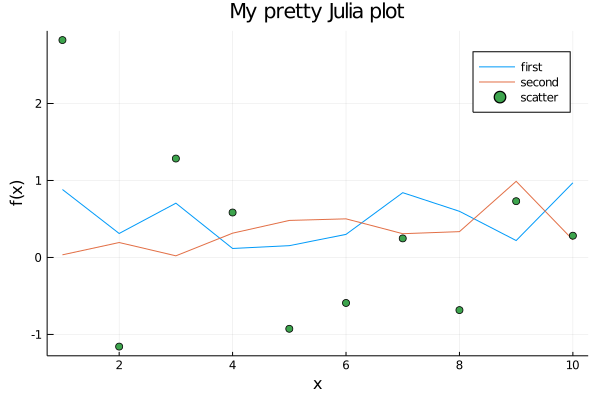

In [176]:
using Plots    # first add, load and using the package

plot(1:10, rand(10), label="first")
plot!(1:10, rand(10), label="second")  # adding to current figure using plot!

scatter!([1:10], randn(10), label="scatter")   # add scatter

xlabel!("x")
ylabel!("f(x)")
title!("My pretty Julia plot") 


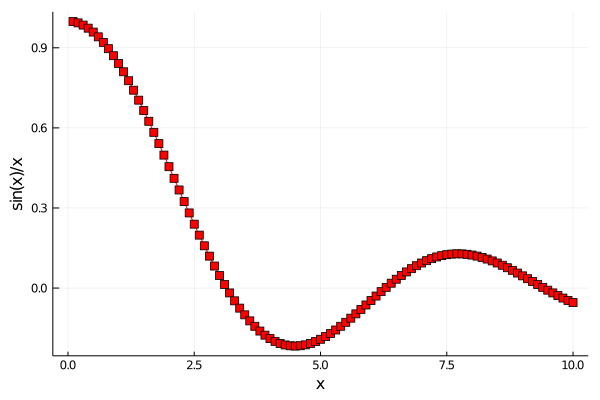

In [177]:
# notice the use of a symbol as an argument !, notice the range(0:0.1:10)--the steps and the range
plot(0:0.1:10, x -> sin(x) / x, xlabel="x", ylabel="sin(x)/x", color=:red, marker=:square, legend=:none)

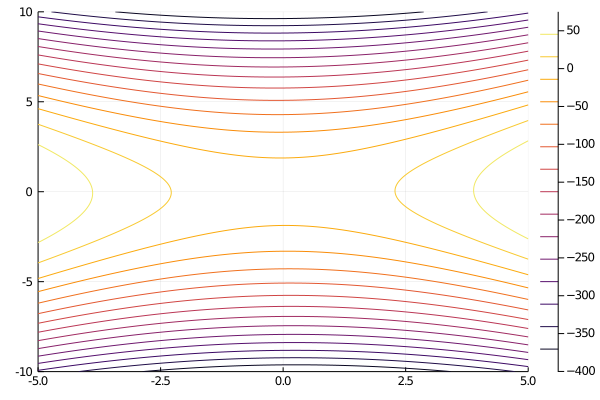

In [178]:
contour(-5:0.1:5, -10:0.1:10, (x, y) -> 3x^2-4y^2 + x*y/6)   # contour plot , using function "contour"

# Exercises

## 1

Write a function named `rightjustify` that takes a string named `s` as a parameter and prints the string with enough leading spaces so that the last letter of the string is in column 70 of the display.

Use string concatenation and repetition. Also, Julia provides a built-in function called `length`. Check what it does!

In [183]:
function rightjustify(s::String)
    return (" "^(70 - length(s)) * s)    
end

rightjustify (generic function with 1 method)

In [186]:
print(rightjustify("snfidfijgofvogb"))
length(rightjustify("snfidfijgofvogb"))

                                                       snfidfijgofvogb

70

## 2

1. Write a function `printgrid` that draws a grid like the following:

In [188]:
+ - - - - + - - - - +
|         |         |
|         |         |
|         |         |
|         |         |
+ - - - - + - - - - +
|         |         |
|         |         |
|         |         |
|         |         |
+ - - - - + - - - - +

MethodError: MethodError: no method matching -(::typeof(+))
Closest candidates are:
  -(!Matched::Float64, !Matched::Float64) at float.jl:403
  -(!Matched::Float64) at float.jl:393
  -(!Matched::Bool, !Matched::Complex{Bool}) at complex.jl:288
  ...

2. Write a function that draws a similar grid with four rows and four columns.

Tips:

To print more than one value on a line, you can print a comma-separated sequence of values:

`println("+", "-")`

The function `print` does not advance to the next line.

In [ ]:
function printgrid()
end

## 3

The function `time` returns the current Greenwich Mean Time in seconds since "the epoch", which is an arbitrary time used as a reference point. On UNIX systems, the epoch is 1 January 1970.
Write a script that reads the current time and converts it to a time of day in hours, minutes, and seconds, plus the number of days since the epoch.

## 4

Fermat’s Last Theorem says that there are no positive integers $a$, $b$, and $c$ such that

$a^n + b^n = c^n$

for any value of $n$ greater than 2.

1. Write a function named `checkfermat` that takes four parameters ($a$, $b$, $c$ and $n$) and checks to see if Fermat’s theorem holds. If $n$ is greater than 2 and $a^n + b^n == c^n$ the program should print, "Holy smokes, Fermat was wrong!" Otherwise the program should print, "No, that doesn’t work."

2. Write a function that prompts the user to input values for $a$, $b$, $c$ and $n$, converts them to integers, and uses checkfermat to check whether they violate Fermat’s theorem. Tip: check the functions `readline` and `parse`

3. Can you write the code so that the functions in 4.1 and 4.2 have the same name?